In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use of K-means algorithm for customer segmentation

In [2]:
df = pd.read_csv('marketing_conversion_rate.csv')
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


Transformation of categorical data to be used by the machine learning algorithms

In [3]:
from sklearn import preprocessing

le_zip = preprocessing.LabelEncoder()
le_channel = preprocessing.LabelEncoder()
le_offer = preprocessing.LabelEncoder()

df['zip_code'] = le_zip.fit_transform(df['zip_code'])
df['channel'] = le_channel.fit_transform(df['channel'])
df['offer'] = le_offer.fit_transform(df['offer'])

list_categorical = ['zip_code', 'channel', 'offer']

df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,1,0,1,0,0
1,6,329.08,1,1,0,1,2,2,0
2,7,180.65,0,1,1,1,2,0,0
3,9,675.83,1,0,0,1,2,1,0
4,2,45.34,1,0,2,0,2,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  int64  
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  int64  
 7   offer          64000 non-null  int64  
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.4 MB


In [5]:
df.describe()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,1.251531,0.502250,1.319609,0.998734,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.697936,0.499999,0.678254,0.816754,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000


In [6]:
from imblearn.over_sampling import SMOTE

X = df.drop('conversion', axis=1).values
y = df['conversion'].values

sampler = SMOTE()

X, y = sampler.fit_sample(X, y)

In [7]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

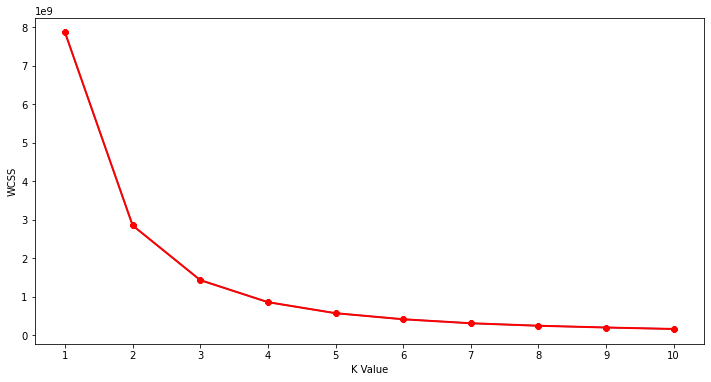

In [8]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [9]:
#Taking 4 clusters
km1=KMeans(n_clusters=4)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
predictions = km1.predict(X)

In [10]:
#Creating a dataset with  the label information
df_wlabels = pd.DataFrame(X, columns=df.columns[:-1])
df_wlabels['label'] = predictions
df_wlabels

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,label
0,10.000000,142.440000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0
1,6.000000,329.080000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,3
2,7.000000,180.650000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0
3,9.000000,675.830000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1
4,2.000000,45.340000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...
109207,5.986920,703.746266,1.000000,1.000000,1.000000,1.000000,0.000000,0.006540,1
109208,2.000000,601.468612,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1
109209,10.000000,200.217356,1.000000,0.877356,2.000000,0.122644,2.000000,1.000000,0
109210,10.698972,238.462350,1.000000,0.301028,1.301028,0.301028,1.301028,0.000000,3


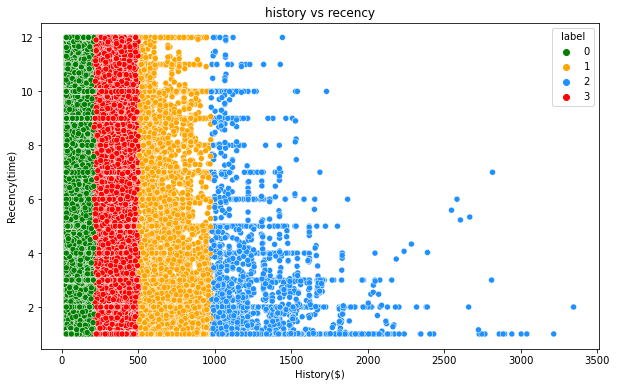

In [12]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'history',y = 'recency',hue="label", palette=['green','orange','dodgerblue','red'], legend='full',data = df_wlabels)
plt.xlabel('History($)')
plt.ylabel('Recency(time)') 
plt.title('history vs recency')
plt.show()